<a href="https://colab.research.google.com/github/Charlotte-99/Y3Project/blob/main/Discontinuous_map_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discontinuous Map Generator


## Setup
Section to mount drive and import modules.

In [ ]:
# Mount google drive folder with .fits maps
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory to project folder
import os
os.chdir('/content/drive/My Drive/Project')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from google.colab import files

## Map making
### Experimenting with amplitude range
First we can import one of the CMB extract arrays and one of the string extract arrays.

Also, import the Planck cmap .txt file.

In [ ]:
cmb_map = np.load('cmb_map0_extracts.npy')
string_map = np.load('map1n_allz_rtaapixlw_2048_1_extracts.npy')

In [ ]:
cmap = ListedColormap(np.loadtxt('planck_map.txt')/255.)

We can check the dimensions of the arrays.

In [ ]:
print(cmb_map.shape)
print(string_map.shape)

(33, 200, 200)
(33, 200, 200)


First we will experiment with the first map from each of these arrays. The two maps are plotted below.

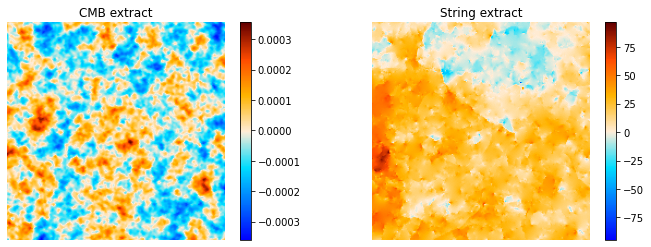

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
pos0 = ax[0].imshow(cmb_map[0], cmap=cmap)
ax[0].set_title('CMB extract')
ax[0].axis('off')
cbar1 = fig.colorbar(pos0, ax=ax[0])

pos1 = ax[1].imshow(string_map[1], cmap=cmap)
ax[1].set_title('String extract')
ax[1].axis('off')
cbar2 = fig.colorbar(pos1, ax=ax[1])

Note that the scale of the CMB extract is in Kelvin, whilst the map for the string extract is in microKelvin.

We can add the two maps together with some multiplicative amplitude factor, $\alpha$. 

Here we make a plot with $\alpha=5$ to make a map with very obvious changes.

(-0.5, 199.5, 199.5, -0.5)

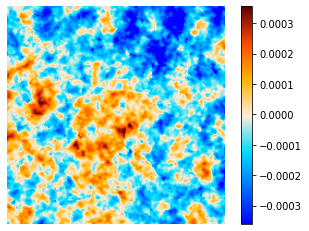

In [ ]:
alpha = 5

sum_map = np.add(cmb_map[0], alpha * string_map[0] * 1e-6)
plt.imshow(sum_map, cmap=cmap, vmin=np.min(cmb_map[0]),
           vmax=np.max(cmb_map[0]))
plt.colorbar()
plt.axis('off')

As well as the general changes in colour (we've set the cmap to be constrained to the min, max values of the original CMB map), we notice some line discontinuities in the image. This can particularly be seen around the large 'hot' patch.

Here we decrease $\alpha$ to 1 and plot this side by side with the original map

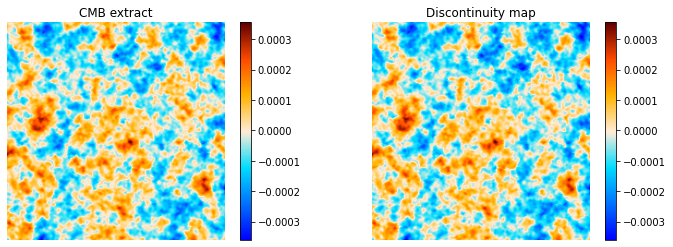

In [ ]:
alpha = 1

sum_map = np.add(cmb_map[0], alpha * string_map[0] * 1e-6)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
pos0 = ax[0].imshow(cmb_map[0], cmap=cmap)
ax[0].set_title('CMB extract')
ax[0].axis('off')
cbar1 = fig.colorbar(pos0, ax=ax[0])

pos1 = ax[1].imshow(sum_map, cmap=cmap, vmin=np.min(cmb_map[0]),
           vmax=np.max(cmb_map[0]))
ax[1].set_title('Discontinuity map')
ax[1].axis('off')
cbar2 = fig.colorbar(pos1, ax=ax[1])

We notice some differences, particularly with some of the blue patches in the top and bottom right of the map. But these differences are much less pronounced and more difficult to spot.

We can write a simple function that takes a value for $\alpha$ and a string and CMB extract.

In [ ]:
def add_discont(cmb, string, alpha):
  return np.add(cmb_map[0], alpha * string_map[0] * 1e-6)

We will generate a set of maps with different values of $\alpha$ and plot these all on the same plot. The colorbar will be constrained to the min/max values of the original CMB map so we can compare them more easily.

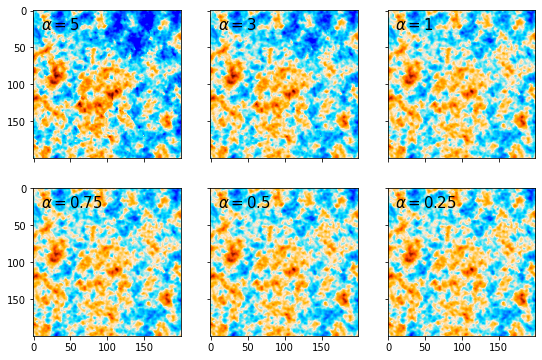

In [ ]:
alpha_list = [5, 3, 1, 0.75, 0.5, 0.25]

fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(9, 6))
cmin = np.min(cmb_map[0])
cmax = np.max(cmb_map[0])

for n, ax in enumerate(axes.flat):
  sum_map = add_discont(cmb_map[0], string_map[0], alpha_list[n])
  ax.imshow(sum_map, cmap=cmap, vmin=cmin, vmax=cmax)
  ax.annotate(fr'$\alpha = {alpha_list[n]}$', xy=(10, 25), fontsize=15,
              weight='bold')

It becomes increasingly difficult to identify the discontinuities by eye for low $\alpha$. Our aim is to identify for which values of $\alpha$ a CNN will be able to identify as being non-Gaussian in nature.